In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
#from matplotlib.mlab import frange
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
import sys
sys.path.append('../')
from datasets import datasets as datat
dts = datat.synthetic_datasets(path_top="../")

from metrics import functions
func = functions.functions()


In [26]:
X_brut, y_transform, full_dataset, x_lim, y_lim, z_lim, data_Version  = dts.TwoD2_V3_2_0()
dataset_name = "TwoD_"+data_Version
datat.datasets_infos(dataset_name=dataset_name, description=dts.description, x_lim=x_lim, y_lim=y_lim, z_lim=z_lim)

dataset_name = TwoD_V3.2.0

Dataset Description : 
Jeu de données à 2 dimensions constitué de 1500 données normales et de 15 données anormales. 
 Les données anormales se retrouvent au centre d'un grand cercle formé par les données normales. 
 Les données normales sont à une distance maximale de 2 les unes des autres. 
 Les données anormales se trouve à une distance minimale de 2 des données normales. 
 Données normales : 
 - Données aléatoires uniform 
 - x entre -12 et 12,  
 - y entre -12 et 12,  
 - taille = 1500,  
 - distance euclidienne entre 7 et 9 (Grand cercle de rayon 9 et petit cercle de rayon 7) 
 Données anormales : 
 - Données aléatoires uniform 
 - x entre -12 et 12,  
 - y entre -12 et 12,  
 - taille = 15,  
 - distance euclidienne entre 0.0 et 5 (Grand cercle de rayon 5 et petit cercle de rayon 0.0)

Dataset Visualization Parameters
x_lim = 16.0
y_lim = 11.0
z_lim = 0.0



### Exécution de Isolation Forest sur le jeux de données Shuttle en faisant varier n_estimators

In [35]:
#func_IF, IFD_y_pred_IF, IFD_scores, IFD_paths_length, X_normal, X_abnormal, result_dataset, exec_time, exec_memory = func.execute_IForest_GivenPathLength(
#        X_brut=X_brut, max_samples=max_samples, n_trees=n_trees, 
#                                                 threshold=threshold,
#                                                 X_train=X_train)


func_IF_Shuttle = IsolationForest(behaviour="new", contamination=0.001)
func_IF_Shuttle.fit(X_brut)
y_pred_IF_Shuttle = func_IF_Shuttle.predict(X_brut)
print("Prediction")
print(y_pred_IF_Shuttle)
y_SS_IF_Shuttle = func_IF_Shuttle.score_samples(X_brut)
print("Score samples")
print(y_SS_IF_Shuttle)
y_DF_IF_Shuttle = func_IF_Shuttle.decision_function(X_brut)
print("Decision Function")
print(y_DF_IF_Shuttle)

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Prediction
[1 1 1 ... 1 1 1]
Score samples
[-0.5016401  -0.50064014 -0.48586644 ... -0.5812025  -0.57887172
 -0.5810066 ]
Decision Function
[0.08833763 0.08933759 0.1041113  ... 0.00877523 0.01110601 0.00897113]


ROC Curve with Prediction
fpr 
[0. 1. 1.]
tpr 
[0.         0.99866667 1.        ]
thresholds 
[ 2  1 -1]


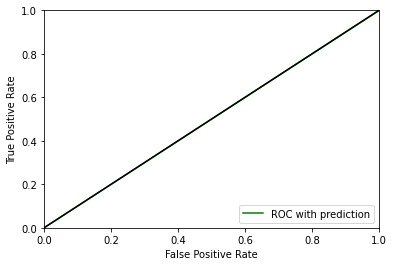

In [36]:
# ROC Curve
fpr_pred, tpr_pred, thresholds_pred = roc_curve(y_transform, y_pred_IF_Shuttle)
print("ROC Curve with Prediction")
print("fpr ")
print(fpr_pred)
print("tpr ")
print(tpr_pred)
print("thresholds ")
print(thresholds_pred)
plt.plot(fpr_pred, tpr_pred, "g-", label="ROC with prediction")
plt.plot([0, 1], [0, 1], 'k-') 
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
    
plt.show()

1515
ROC Curve with Score samples
fpr 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.06666667 0.06666667 0.13333333 0.13333333 0.2
 0.2        0.26666667 0.26666667 0.33333333 0.33333333 0.4
 0.4        0.53333333 0.53333333 0.86666667 0.86666667 0.93333333
 0.93333333 1.         1.        ]
45
tpr 
[0.00000000e+00 6.66666667e-04 1.59333333e-01 1.60666667e-01
 3.50000000e-01 3.51333333e-01 3.85333333e-01 3.86666667e-01
 3.87333333e-01 3.88666667e-01 5.37333333e-01 5.38666667e-01
 6.00666667e-01 6.02000000e-01 6.49333333e-01 6.50666667e-01
 7.84000000e-01 7.85333333e-01 8.03333333e-01 8.04666667e-01
 8.70000000e-01 8.71333333e-01 9.48000000e-01 9.49333333e-01
 9.53333333e-01 9.53333333e-01 9.78666667e-01 9.78666667e-01
 9.84000000e-01 9.84000000e-01 9.89333333e-01 9.89333333e-01
 9.9066

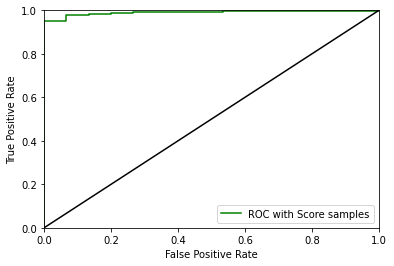

In [37]:
# ROC Curve
fpr_SS, tpr_SS, thresholds_SS = roc_curve(y_transform, y_SS_IF_Shuttle)
print(len(y_SS_IF_Shuttle))
print("ROC Curve with Score samples")
print("fpr ")
print(fpr_SS)
print(len(fpr_SS))
print("tpr ")
print(tpr_SS)
print(len(tpr_SS))
print("thresholds ")
print(thresholds_SS)
print(len(thresholds_SS))
plt.plot(fpr_SS, tpr_SS, "g-", label="ROC with Score samples")
plt.plot([0, 1], [0, 1], 'k-') 
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
    
plt.show()

ROC Curve with Decision function
fpr 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.06666667 0.06666667 0.13333333 0.13333333 0.2
 0.2        0.26666667 0.26666667 0.33333333 0.33333333 0.4
 0.4        0.53333333 0.53333333 0.86666667 0.86666667 0.93333333
 0.93333333 1.         1.        ]
45
tpr 
[0.00000000e+00 6.66666667e-04 1.59333333e-01 1.60666667e-01
 3.50000000e-01 3.51333333e-01 3.85333333e-01 3.86666667e-01
 3.87333333e-01 3.88666667e-01 5.37333333e-01 5.38666667e-01
 6.00666667e-01 6.02000000e-01 6.49333333e-01 6.50666667e-01
 7.84000000e-01 7.85333333e-01 8.03333333e-01 8.04666667e-01
 8.70000000e-01 8.71333333e-01 9.48000000e-01 9.49333333e-01
 9.53333333e-01 9.53333333e-01 9.78666667e-01 9.78666667e-01
 9.84000000e-01 9.84000000e-01 9.89333333e-01 9.89333333e-01
 9.90666

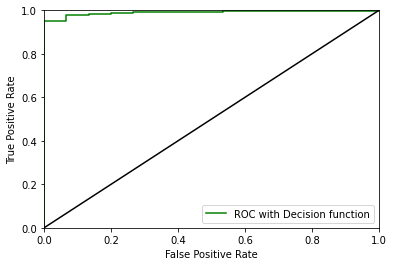

In [38]:
# ROC Curve
fpr_DF, tpr_DF, thresholds_DF = roc_curve(y_transform, y_DF_IF_Shuttle)
print("ROC Curve with Decision function")
print("fpr ")
print(fpr_DF)
print(len(fpr_DF))
print("tpr ")
print(tpr_DF)
print(len(tpr_DF))
print("thresholds ")
print(thresholds_DF)
print(len(thresholds_DF))
plt.plot(fpr_DF, tpr_DF, "g-", label="ROC with Decision function")
plt.plot([0, 1], [0, 1], 'k-') 
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
    
plt.show()